# DSCI 573 - Feature and Model Selection

# Lab 4: A mini project - Putting it all together

## Table of contents
0. [Submission instructions](#si) (4%)
1. [Understanding the problem](#1) (4%)
2. [Data splitting](#2) (2%)
3. [EDA](#3) (10%)
4. (Optional) [Feature engineering](#4)
5. [Preprocessing and transformations](#5) (10%)
6. [Baseline model](#6) (2%)
7. [Linear models](#7) (10%)
8. [Different models](#8) (16%)
9. (Optional) [Feature selection](#9)
10. [Hyperparameter optimization](#10) (10%)
11. [Interpretation and feature importances](#11) (10%)
12. [Results on the test set](#12) (10%)
13. [Summary of the results](#13) (12%)
15. (Optional) [Reproducible data analysis pipeline](#14)
15. (Optional) [Your takeaway from the course](#15)

## Submission instructions <a name="si"></a>
<hr>
rubric={mechanics:4}

You will receive marks for correctly submitting this assignment. To submit this assignment, follow the instructions below:

- **Which problem did you pick, classification or regression?**
- **Report your test score here along with the metric used:** 
- **Please add a link to your GitHub repository here: https://github.ubc.ca/mds-2021-22/DSCI_573_lab4_mrezam**
- **You don't have to but you may work on this assignment in a group (group size <= 4) and submit your assignment as a group.** 
- Below are some instructions on working as a group.  
    - The maximum group size is 4. 
    - You can choose your own group members. Since I don't know your groups in advance, I am not opening this lab as a group lab. So you all will have a separate GitHub repository for your labs and you'll have to decide how you want to collaborate. 
    - Use group work as an opportunity to collaborate and learn new things from each other. 
    - Be respectful to each other and make sure you understand all the concepts in the assignment well. 
    - It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. [Here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members) are some instructions on adding group members in Gradescope.  
- Be sure to follow the [general lab instructions](https://ubc-mds.github.io/resources_pages/general_lab_instructions/).
- Make at least three commits in your lab's GitHub repository.
- Push the final .ipynb file with your solutions to your GitHub repository for this lab.
- Upload the .ipynb file to Gradescope.
- If the .ipynb file is too big or doesn't render on Gradescope for some reason, also upload a pdf or html in addition to the .ipynb. 
- Make sure that your plots/output are rendered properly in Gradescope.

> [Here](https://github.com/UBC-MDS/public/tree/master/rubric) you will find the description of each rubric used in MDS.

> As usual, do not push the data to the repository. 

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as npla
import numpy.random as npr
import pandas as pd
from IPython.display import display
from sklearn import datasets
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, RidgeCV
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.ensemble import RandomForestRegressor

import altair as alt

import altair as alt
# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('mimetype')
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

## Introduction <a name="in"></a>

In this lab you will be working on an open-ended mini-project, where you will put all the different things you have learned so far in 571 and 573 together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (2-8 hours???) is a good guideline for a typical submission. Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

## 1. Pick your problem and explain what exactly you are trying to predict <a name="1"></a>
<hr>
rubric={reasoning:4}

In this mini project, you will pick one of the following problems: 

- A classification problem of predicting whether a credit card client will default or not. For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

OR 

- A regression problem of predicting `reviews_per_month`, as a proxy for the popularity of the listing with [New York City Airbnb listings from 2019 dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data). Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 
3. Carry out any preliminary preprocessing, if needed (e.g., changing feature names, handling of NaN values etc.)

<br><br>

## 2. Data splitting <a name="2"></a>
<hr>
rubric={reasoning:2}

**Your tasks:**

1. Split the data into train and test portions.

> Make decision on the `test_size` based on the capacity of your laptop. Don't forget to use a random state.  

In [2]:
airbnb_df = pd.read_csv('AB_NYC_2019.csv')
train_df, test_df = train_test_split(airbnb_df, test_size=0.4, random_state=123)

# We have split the X and Y in the preprocessing step after w ehave cleaned the data in the EDA step

# X_train, y_train = train_df.drop(columns=['reviews_per_month']) , train_df['reviews_per_month']    
# X_test, y_test = test_df.drop(columns = ['reviews_per_month']) , test_df['reviews_per_month']

# train_df.info()

<br><br>

## 3. EDA <a name="3"></a>
<hr>
rubric={viz:4,reasoning:6}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

In [3]:
train_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.933700e+04,2.933700e+04,29337.000000,29337.000000,29337.000000,29337.000000,29337.000000,23386.000000,29337.000000,29337.000000
mean,1.891988e+07,6.714579e+07,40.729013,-73.952217,150.939121,7.141971,23.354501,1.369867,7.003340,112.803627
std,1.102155e+07,7.835404e+07,0.054594,0.046091,228.224188,22.272110,44.692480,1.706732,32.511623,131.544488
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.350729e+06,7.740184e+06,40.690090,-73.983030,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.951751e+07,3.071907e+07,40.723140,-73.955530,107.000000,3.000000,5.000000,0.710000,1.000000,45.000000
75%,2.916531e+07,1.064429e+08,40.763280,-73.936430,175.000000,5.000000,23.000000,2.010000,2.000000,227.000000
max,3.648561e+07,2.743213e+08,40.912340,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29337 entries, 17877 to 15725
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              29337 non-null  int64  
 1   name                            29328 non-null  object 
 2   host_id                         29337 non-null  int64  
 3   host_name                       29325 non-null  object 
 4   neighbourhood_group             29337 non-null  object 
 5   neighbourhood                   29337 non-null  object 
 6   latitude                        29337 non-null  float64
 7   longitude                       29337 non-null  float64
 8   room_type                       29337 non-null  object 
 9   price                           29337 non-null  int64  
 10  minimum_nights                  29337 non-null  int64  
 11  number_of_reviews               29337 non-null  int64  
 12  last_review                 

In [5]:
train_df['host_id'].value_counts

<bound method IndexOpsMixin.value_counts of 17877      1683437
14638     10307134
7479        329917
47058     35965489
9769      29156329
           ...    
7763       4291007
15377     66501870
17730      7177483
28030    159769278
15725     65809485
Name: host_id, Length: 29337, dtype: int64>

In [6]:
train_df['last_review'].value_counts

<bound method IndexOpsMixin.value_counts of 17877    2018-05-28
14638    2019-06-16
7479     2016-10-21
47058           NaN
9769     2018-09-19
            ...    
7763     2019-06-01
15377    2019-06-30
17730    2019-01-01
28030    2019-06-04
15725    2019-04-29
Name: last_review, Length: 29337, dtype: object>

In [7]:
train_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [8]:
print('The number rows that have missing data in reviews per month and 0 number of reviews', train_df.query('reviews_per_month.isna() & number_of_reviews==0').shape)

print('The number rows that have 0 number of reviews', train_df.query('number_of_reviews==0').shape)

# Exactly the data that their review per month are missing have 0 the number of reviews. Therefore, we can give zero to these missing data .

train_df.loc[train_df['reviews_per_month'].isna(), 'reviews_per_month'] = 0

test_df.loc[test_df['reviews_per_month'].isna(), 'reviews_per_month'] = 0

train_df = train_df.dropna()
test_df = test_df.dropna()


The number rows that have missing data in reviews per month and 0 number of reviews (5951, 16)
The number rows that have 0 number of reviews (5951, 16)


In [9]:
corr_df = train_df.select_dtypes('number').corr('spearman').abs().stack().reset_index(name='corr')
corr_df.loc[corr_df['corr'] == 1, 'corr'] = 0  # Remove diagonal
corr_df
alt.Chart(corr_df).mark_circle().encode(
    x='level_0',
    y='level_1',
    size='corr',
    color=alt.Color('corr', scale=alt.Scale(scheme='blueorange', domain=(-1, 1))))

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In [10]:

alt.Chart(train_df).mark_bar().encode(
     alt.X(alt.repeat(), type='quantitative', bin=alt.Bin(maxbins=40)),
     y='count()',
).properties(
    width=300,
    height=200
).repeat(
    ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 
    'reviews_per_month', 'calculated_host_listings_count','availability_365'],
    columns=3
)


<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In [11]:
train_df["room_type"].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [12]:
train_df["neighbourhood"].value_counts()

Bedford-Stuyvesant    1899
Williamsburg          1873
Harlem                1316
Bushwick              1163
Hell's Kitchen         932
                      ... 
Huguenot                 1
Rosebank                 1
Richmondtown             1
Holliswood               1
Eltingville              1
Name: neighbourhood, Length: 214, dtype: int64

<br><br>

## (Optional) 4. Feature engineering <a name="4"></a>
<hr>
rubric={reasoning:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<br><br>

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={accuracy:6,reasoning:4}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

In [13]:
X_train, y_train = train_df.drop(columns=['reviews_per_month']) , train_df['reviews_per_month']    
X_test, y_test = test_df.drop(columns = ['reviews_per_month']) , test_df['reviews_per_month']

In [29]:

numeric_feats = ['latitude','longitude','price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']
categorical_feats = ['neighbourhood_group', 'neighbourhood', 'room_type']
drop_feats = ['id','host_id', 'host_name', 'last_review']
text_feats = "name"

preprocessor = make_column_transformer(
    (StandardScaler(), numeric_feats),
    (OneHotEncoder(handle_unknown="ignore"), categorical_feats),
    (CountVectorizer(stop_words="english"), text_feats),
    ("drop", drop_feats),
)



<br><br>

## 6. Baseline model <a name="6"></a>
<hr>
rubric={accuracy:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

In [15]:
results = {}

In [16]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [17]:
dummy = DummyRegressor()
results['dummy'] = mean_std_cross_val_scores(dummy, X_train, y_train, cv=10, return_train_score=True)
pd.DataFrame(results)

,dummy
fit_time,0.008 (+/- 0.004)
score_time,0.001 (+/- 0.000)
test_score,-0.001 (+/- 0.001)
train_score,0.000 (+/- 0.000)


<br><br>

## 7. Linear models <a name="7"></a>
<hr>
rubric={accuracy:6,reasoning:4}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the regularization hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

In [18]:
pipe_ridge = make_pipeline(preprocessor, Ridge())
results['Ridge'] = mean_std_cross_val_scores(pipe_ridge, X_train, y_train, return_train_score=True)
pd.DataFrame(results)

,dummy,Ridge
fit_time,0.008 (+/- 0.004),0.308 (+/- 0.043)
score_time,0.001 (+/- 0.000),0.045 (+/- 0.002)
test_score,-0.001 (+/- 0.001),0.350 (+/- 0.028)
train_score,0.000 (+/- 0.000),0.525 (+/- 0.009)


In [19]:
from sklearn.model_selection import RandomizedSearchCV
param_grid_alpha = {
    "ridge__alpha": 10.0 ** np.arange(-2, 6, 1), 
}

rs_alpha = RandomizedSearchCV(
    pipe_ridge,
    param_distributions=param_grid_alpha,
    n_jobs=-1,
    n_iter=6,
    cv=5,
    random_state=123,
)
rs_alpha.fit(X_train, y_train)
rs_alpha.best_params_
rs_alpha.best_score_

0.37466322891747433

<br><br>

## 8. Different models <a name="8"></a>
<hr>
rubric={accuracy:10,reasoning:6}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

In [20]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm.sklearn import LGBMRegressor

pipe_lgbm = make_pipeline(preprocessor, LGBMRegressor(random_state=123))
results['LGBM'] = mean_std_cross_val_scores(pipe_lgbm, X_train, y_train, return_train_score=True)
pd.DataFrame(results)

,dummy,Ridge,LGBM
fit_time,0.008 (+/- 0.004),0.308 (+/- 0.043),0.467 (+/- 0.024)
score_time,0.001 (+/- 0.000),0.045 (+/- 0.002),0.083 (+/- 0.023)
test_score,-0.001 (+/- 0.001),0.350 (+/- 0.028),0.542 (+/- 0.040)
train_score,0.000 (+/- 0.000),0.525 (+/- 0.009),0.662 (+/- 0.009)


In [21]:
pipe_xgb = make_pipeline(preprocessor, XGBRegressor(verbosity=0))
results['XGB'] = mean_std_cross_val_scores(pipe_xgb, X_train, y_train, return_train_score=True)
pd.DataFrame(results)

,dummy,Ridge,LGBM,XGB
fit_time,0.008 (+/- 0.004),0.308 (+/- 0.043),0.467 (+/- 0.024),2.641 (+/- 0.282)
score_time,0.001 (+/- 0.000),0.045 (+/- 0.002),0.083 (+/- 0.023),0.084 (+/- 0.002)
test_score,-0.001 (+/- 0.001),0.350 (+/- 0.028),0.542 (+/- 0.040),0.535 (+/- 0.039)
train_score,0.000 (+/- 0.000),0.525 (+/- 0.009),0.662 (+/- 0.009),0.727 (+/- 0.008)


In [22]:
pipe_cb = make_pipeline(preprocessor, CatBoostRegressor(verbose=0))
results['Catboost'] = mean_std_cross_val_scores(pipe_cb, X_train, y_train, return_train_score=True)
pd.DataFrame(results)

,dummy,Ridge,LGBM,XGB,Catboost
fit_time,0.008 (+/- 0.004),0.308 (+/- 0.043),0.467 (+/- 0.024),2.641 (+/- 0.282),10.745 (+/- 1.068)
score_time,0.001 (+/- 0.000),0.045 (+/- 0.002),0.083 (+/- 0.023),0.084 (+/- 0.002),0.056 (+/- 0.007)
test_score,-0.001 (+/- 0.001),0.350 (+/- 0.028),0.542 (+/- 0.040),0.535 (+/- 0.039),0.545 (+/- 0.026)
train_score,0.000 (+/- 0.000),0.525 (+/- 0.009),0.662 (+/- 0.009),0.727 (+/- 0.008),0.677 (+/- 0.008)


<br><br>

## (Optional) 9. Feature selection <a name="9"></a>
<hr>
rubric={reasoning:1}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV`, forward selection or L1 regularization for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<br><br>

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={accuracy:6,reasoning:4}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

In [23]:
param_grid_lgbm = {
    "lgbmregressor__num_leaves": [10,30,50,100], 
    "lgbmregressor__max_depth": [-1, 1000, 5000, 10000, 30000], 
    "lgbmregressor__n_estimators": 10 ** np.arange(1, 6, 1)
}

random_search = RandomizedSearchCV(
    pipe_lgbm,
    param_distributions=param_grid_lgbm,
    n_jobs=-1,
    n_iter=6,
    cv=5,
    random_state=123,
)


In [24]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('standardscaler',
                                                                               StandardScaler(),
                                                                               ['latitude',
                                                                                'longitude',
                                                                                'price',
                                                                                'minimum_nights',
                                                                                'number_of_reviews',
                                                                                'calculated_host_listings_count',
                                                                                'availability_365']),
                         

In [25]:
random_search.best_score_

0.5447291434721689

In [32]:
random_search.best_params_

{'lgbmregressor__num_leaves': 10,
 'lgbmregressor__n_estimators': 1000,
 'lgbmregressor__max_depth': -1}

<br><br>

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={accuracy:6,reasoning:4}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`), or any other methods of your choice, to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

In [28]:
import shap

In [34]:
pipe_lgbm_tuned = make_pipeline(
    preprocessor, 
    LGBMRegressor(
        num_leaves = random_search.best_params_['lgbmregressor__num_leaves'],
        n_estimators= random_search.best_params_['lgbmregressor__n_estimators'],
        max_depth= random_search.best_params_['lgbmregressor__max_depth'],
        random_state=123
    )
)

In [37]:
pipe_lgbm_tuned.fit(X_train, y_train)

ohe_feature_names = (
    pipe_lgbm_tuned.named_steps["columntransformer"]
    .named_transformers_["onehotencoder"]
    .get_feature_names_out(categorical_feats)
    .tolist()
)

count_feature_names = (
    pipe_lgbm_tuned.named_steps["columntransformer"]
    .named_transformers_["countvectorizer"]
    .get_feature_names_out()
    .tolist()
)
feature_names = (numeric_feats + ohe_feature_names + count_feature_names)

In [39]:
X_train_enc = pd.DataFrame(
    data=preprocessor.transform(X_train).toarray(),
    columns=feature_names,
    index=X_train.index,
)
X_train_enc.shape

(23374, 5350)

In [44]:
X_test_enc = pd.DataFrame(
    data=preprocessor.transform(X_test).toarray(),
    columns=feature_names,
    index=X_test.index,
)
X_test_enc.shape

(15447, 5350)

In [46]:
pipe_lgbm_tuned.fit(X_train, y_train)

lgbm_explainer = shap.TreeExplainer(pipe_lgbm_tuned.named_steps["lgbmregressor"])
train_lgbm_shap_values = lgbm_explainer.shap_values(X_train_enc)
train_lgbm_shap_values.shape

(23374, 5350)

In [47]:
# We are only extracting shapely values for the first 100 test examples for speed.
test_lgbm_shap_values = lgbm_explainer.shap_values(X_test_enc[:100])
test_lgbm_shap_values.shape

(100, 5350)

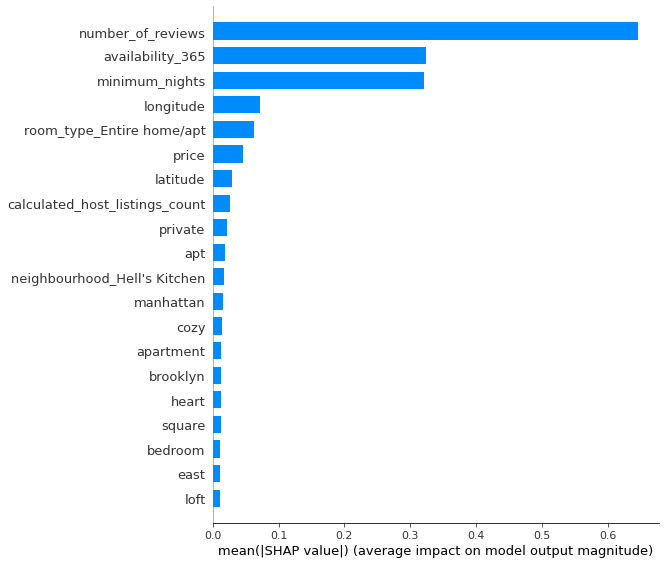

In [49]:
shap.initjs()
shap.summary_plot(train_lgbm_shap_values, X_train_enc, plot_type="bar")

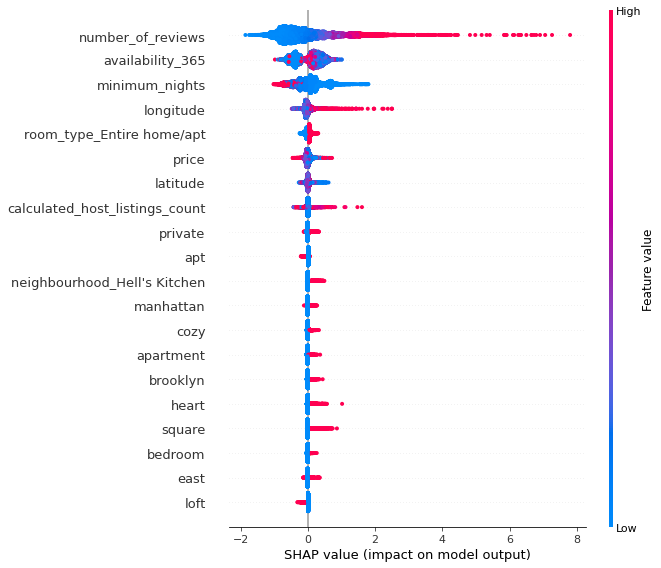

In [50]:
shap.summary_plot(train_lgbm_shap_values, X_train_enc)

array([0.69130106])

0.32

<br><br>

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={accuracy:6,reasoning:4}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain them with SHAP force plots.  

In [72]:
mean_std_cross_val_scores(pipe_lgbm_tuned, X_train, y_train, return_train_score=True)

fit_time       1.137 (+/- 0.066)
score_time     0.169 (+/- 0.006)
test_score     0.545 (+/- 0.040)
train_score    0.720 (+/- 0.005)
dtype: object

In [73]:
pipe_lgbm_tuned.score(X_test, y_test)

0.5677886476112927

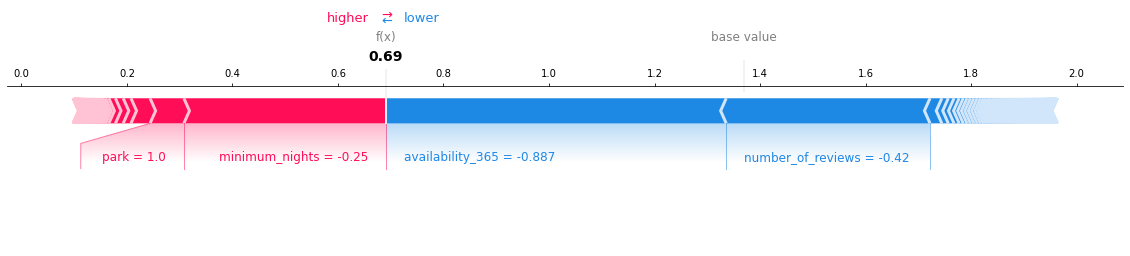

In [74]:
X_train_enc = X_train_enc.round(3)
X_test_enc = X_test_enc.round(3)
shap.force_plot(
    lgbm_explainer.expected_value,
    test_lgbm_shap_values[8],
    X_test_enc.iloc[8, :],
    matplotlib=True,
)

In [81]:
print('Pridicted value', pipe_lgbm_tuned.predict(pd.DataFrame(X_test.iloc[8]).T))
print('The actual value',y_test.iloc[8])

Pridicted value [0.69130106]
The actual value 0.32


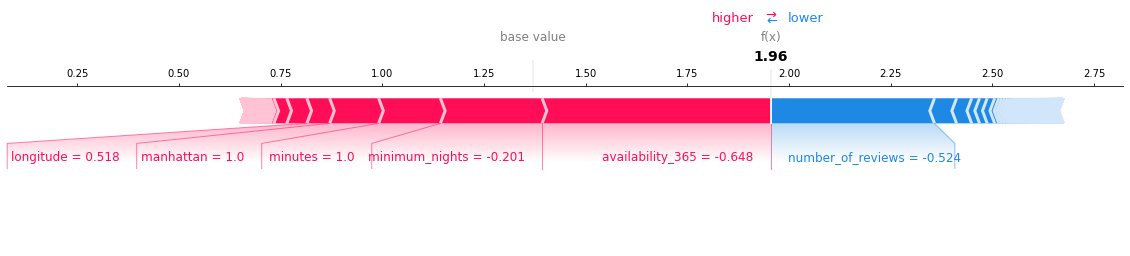

In [78]:
shap.force_plot(
    lgbm_explainer.expected_value,
    test_lgbm_shap_values[50],
    X_test_enc.iloc[50, :],
    matplotlib=True,
)

In [82]:
print('Pridicted value', pipe_lgbm_tuned.predict(pd.DataFrame(X_test.iloc[50]).T))
print('The actual value',y_test.iloc[50])

Pridicted value [1.955218]
The actual value 1.15


2) Yes the score on the test data is very close to our validation score; therefore, we can tust our results.

<br><br>

## 13. Summary of results <a name="13"></a>
<hr>
rubric={reasoning:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<br><br>

## (Optional) 14. Creating a data analysis pipeline <a name="14"></a>
rubric={reasoning:2}

**Your tasks:**
- In 522 you learned how build a reproducible data analysis pipeline. Convert this notebook into scripts and create a reproducible data analysis pipeline with appropriate documentation. 

<br><br>

## (Optional) 15. Your takeaway from the course <a name="15"></a>
<hr>
rubric={reasoning:1}

**Your tasks:**

What is your biggest takeaway from this course? 

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Push all your work to your GitHub lab repository. 
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

Well done!! Have a great weekend! 

In [ ]:
from IPython.display import Image

Image("eva-well-done.png")